# Boost

## Adaboost

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load the breast dataset
data = load_breast_cancer()
breast_cancer = pd.DataFrame(data.data, columns=data.feature_names)

# Just use only 2 features for demonstration
breast_cancer = breast_cancer.loc[:, ["mean radius", "mean compactness"]]

display(breast_cancer)

,mean radius,mean compactness
0,17.99,0.27760
1,20.57,0.07864
2,19.69,0.15990
3,11.42,0.28390
4,20.29,0.13280
...,...,...
564,21.56,0.11590
565,20.13,0.10340
566,16.60,0.10230
567,20.60,0.27700


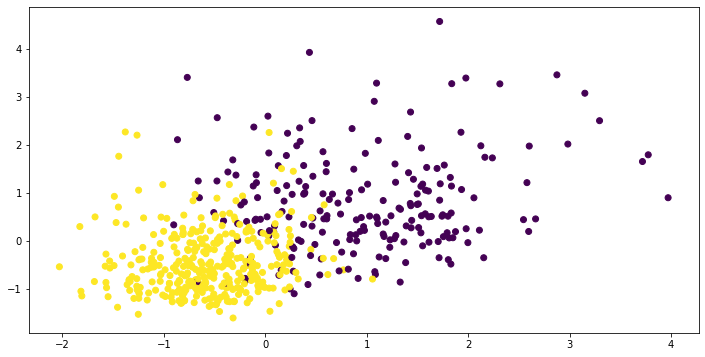

In [2]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
X = StandardScaler().fit_transform(breast_cancer)
plt.scatter(X[:, 0], X[:, 1], c=data.target)

In [8]:
from sklearn.ensemble import AdaBoostClassifier

# Set different boost times to see the result
models = []
boost_times = [50, 100, 500, 1000]

for times in boost_times:
    model = AdaBoostClassifier(n_estimators=times, random_state=1).fit(X, data.target)
    models.append(model)

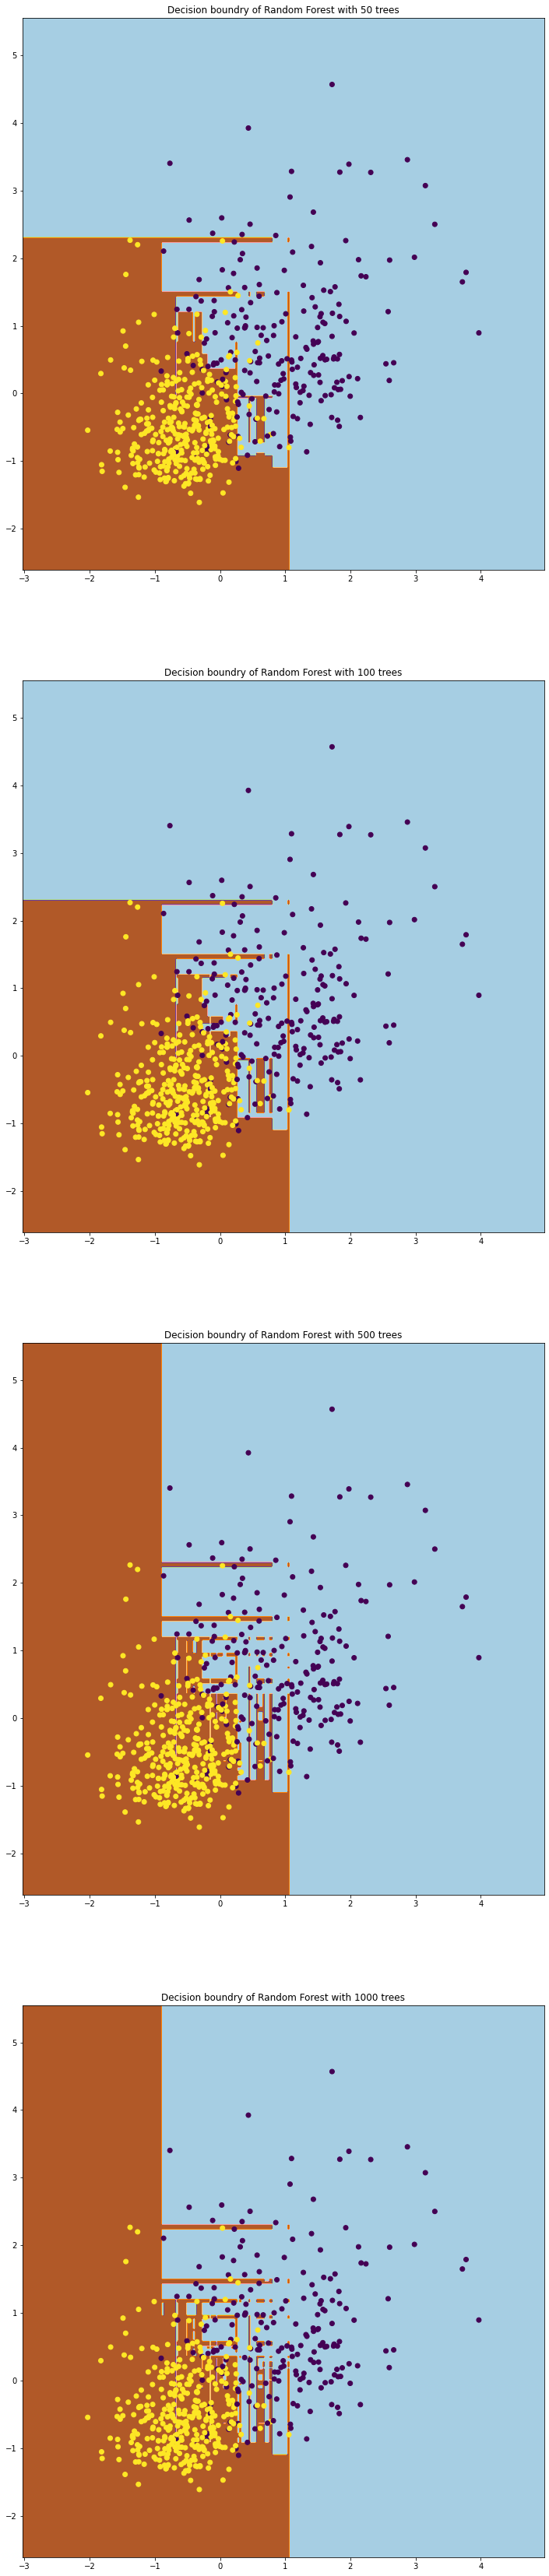

In [9]:
import numpy as np

# Plot the decision boundry

# Get the grid value
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))


# Plot the figure

plt.figure(figsize=(12, 60))

for index, model in enumerate(models):
    plt.subplot(len(models), 1, index + 1)
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.title(f"Decision boundry of Random Forest with {boost_times[index]} trees")
    # Plot contour with color filled
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot training data
    plt.scatter(X[:, 0], X[:, 1], c=data.target)